In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns

In [2]:
#(credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction) 
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
heart.HeartDisease = heart.HeartDisease.astype(str)

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


## Identifying and removing outliers from the numerical columns of the DataFrame t using z-scores

In [7]:
import numpy as np
from scipy.stats import zscore

num_col = heart.select_dtypes(include=[np.number]).columns
z_scores = zscore(heart[num_col])
z_scores


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432
...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432


In [8]:
threshold = 3
outlier_mask = np.abs(z_scores) > threshold
df1 = heart[~outlier_mask.any(axis=1)]


In [9]:
df1.shape

(899, 12)

In [10]:
df1= df1.reset_index(drop=True)

In [11]:
df1.HeartDisease = pd.to_numeric(df1.HeartDisease)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             899 non-null    int64  
 1   Sex             899 non-null    object 
 2   ChestPainType   899 non-null    object 
 3   RestingBP       899 non-null    int64  
 4   Cholesterol     899 non-null    int64  
 5   FastingBS       899 non-null    int64  
 6   RestingECG      899 non-null    object 
 7   MaxHR           899 non-null    int64  
 8   ExerciseAngina  899 non-null    object 
 9   Oldpeak         899 non-null    float64
 10  ST_Slope        899 non-null    object 
 11  HeartDisease    899 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 84.4+ KB


## Transform categorical data into a format that can be easily used as input for machine learning models, as many models require numerical input. The get_dummies function is a convenient way to perform this transformation

In [13]:
x_cat= df1[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]

In [14]:
x_cat

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
894,M,TA,Normal,N,Flat
895,M,ASY,Normal,N,Flat
896,M,ASY,Normal,Y,Flat
897,F,ATA,LVH,N,Flat


In [15]:

x_num = df1.drop(columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease'], axis=1)

In [16]:
x_num

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
894,45,110,264,0,132,1.2
895,68,144,193,1,141,3.4
896,57,130,131,0,115,1.2
897,57,130,236,0,174,0.0


In [17]:
x_cat = pd.get_dummies(x_cat, drop_first=True)
x_cat

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1,1,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,1,0
2,1,1,0,0,0,1,0,0,1
3,0,0,0,0,1,0,1,1,0
4,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
894,1,0,0,1,1,0,0,1,0
895,1,0,0,0,1,0,0,1,0
896,1,0,0,0,1,0,1,1,0
897,0,1,0,0,0,0,0,1,0


In [18]:
df1.HeartDisease.value_counts()

1    492
0    407
Name: HeartDisease, dtype: int64

In [19]:
y= df1['HeartDisease']

In [20]:
y

0      0
1      1
2      0
3      1
4      0
      ..
894    1
895    1
896    1
897    1
898    0
Name: HeartDisease, Length: 899, dtype: int64

## Standardixzing the numeric features. Standardization is to rescale the features so that they have the properties of a standard normal distribution (mean=0, standard deviation=1). This can be beneficial for certain machine learning algorithms that are sensitive to the scale of the input features.

In [21]:
from sklearn.preprocessing import StandardScaler
x_num.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0


In [22]:
scaler = StandardScaler()
x_scale= pd.DataFrame(scaler.fit_transform(x_num), columns = x_num.columns)
x_scale.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,-1.428154,0.465900,0.849636,-0.550362,1.384320,-0.855469
1,-0.475855,1.634714,-0.168122,-0.550362,0.752973,0.137516
2,-1.745588,-0.118507,0.793612,-0.550362,-1.535661,-0.855469


In [23]:

x = pd.concat([x_cat, x_scale], axis=1)

In [24]:
x_cat.shape

(899, 9)

In [25]:
x_num.shape

(899, 6)

In [26]:
x.shape

(899, 15)

## Splitting the data set for training and testing of models

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=30)

In [29]:
x_test.shape

(180, 15)

In [30]:
x

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,1,1,0,0,1,0,0,0,1,-1.428154,0.465900,0.849636,-0.550362,1.384320,-0.855469
1,0,0,1,0,1,0,0,1,0,-0.475855,1.634714,-0.168122,-0.550362,0.752973,0.137516
2,1,1,0,0,0,1,0,0,1,-1.745588,-0.118507,0.793612,-0.550362,-1.535661,-0.855469
3,0,0,0,0,1,0,1,1,0,-0.581666,0.349019,0.149344,-0.550362,-1.141069,0.634008
4,1,0,1,0,1,0,0,0,1,0.053200,1.050307,-0.028064,-0.550362,-0.588640,-0.855469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,1,0,0,1,1,0,0,1,0,-0.899099,-1.287320,0.616205,-0.550362,-0.194048,0.336112
895,1,0,0,0,1,0,0,1,0,1.534554,0.699663,-0.046738,1.816985,0.161085,2.520678
896,1,0,0,0,1,0,1,1,0,0.370633,-0.118507,-0.625646,-0.550362,-0.864854,0.336112
897,0,1,0,0,0,0,0,1,0,0.370633,-0.118507,0.354763,-0.550362,1.463238,-0.855469


## Fitting classification algorithms logistic regression and Random forest and checking the accuracy of models for the given dataset

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 


In [32]:
from sklearn.model_selection import StratifiedKFold, cross_val_score 
folds= StratifiedKFold(n_splits=3)

In [33]:
model=LogisticRegression()
result = cross_val_score(model, x_train, y_train.ravel(), cv=3, scoring='accuracy')
result
print('Average score:',result.mean())

Average score: 0.8664923291492329


In [34]:
model1=RandomForestClassifier()
result1=cross_val_score(RandomForestClassifier(n_estimators= 50), x_train, y_train.ravel(), cv=3, scoring='accuracy')
result1
print('Average accuracy:',result1.mean())
result = cross_val_score(model, x_train, y_train.ravel(), cv=3, scoring='accuracy')

Average accuracy: 0.8678754067875407


In [35]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

model1.fit(x_train, y_train.ravel())
y_p = model1.predict(x_test)
accuracy_score(y_test, y_p)

0.8555555555555555

In [36]:
conf_matrix =confusion_matrix(y_test,y_p)
conf_matrix

array([[69, 14],
       [12, 85]], dtype=int64)

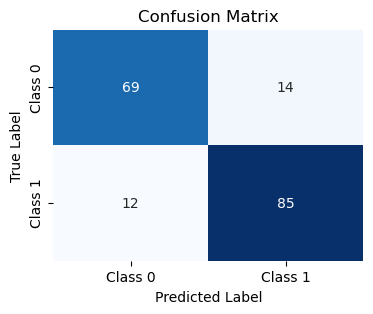

In [37]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
model.fit(x_train, y_train.ravel())
y_predicted = model.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_predicted)
conf_matrix_lr = confusion_matrix(y_test, y_predicted)
print(accuracy_lr)
print(conf_matrix_lr)

0.8666666666666667
[[72 11]
 [13 84]]


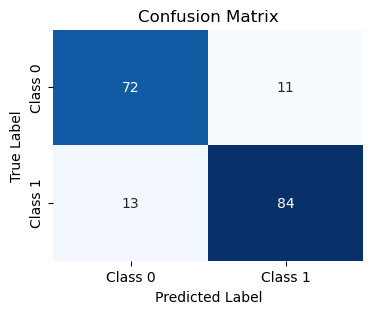

In [39]:
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Apply PCA for dimentionality reduction for the dataset and fitting the models 

In [40]:
from sklearn.decomposition import PCA
pca= PCA(0.80)
x_p = pca.fit_transform(x)
x_p

array([[-2.34470235, -0.64383639, -0.82455183,  0.11532016, -0.54772708,
         0.33266549],
       [-0.22884529, -0.961118  , -0.78156302,  0.04757537, -1.44542131,
        -0.15140567],
       [-1.08550349,  0.02342212,  0.35848547, -1.19038899, -0.14697722,
         1.78785104],
       ...,
       [ 0.96435068,  0.13867114,  0.99118836, -0.56651409, -0.39851822,
         0.01178645],
       [-1.14247291, -0.44045173, -0.54512644, -0.07583807,  0.45739558,
        -0.81521063],
       [-2.19136673,  0.1707719 , -0.65416055,  0.15704973, -1.20027459,
        -0.08013537]])

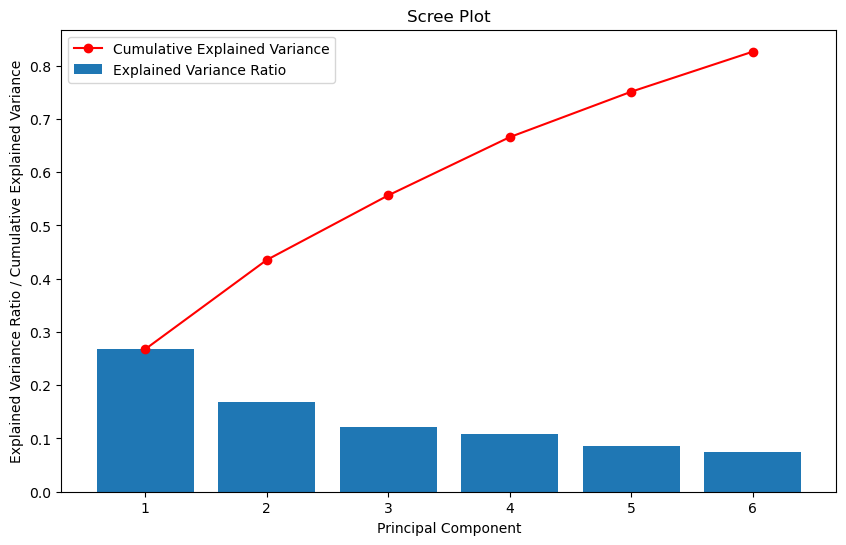

In [41]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio / Cumulative Explained Variance')
plt.legend()
plt.show()

In [42]:
result_pca= cross_val_score(RandomForestClassifier(n_estimators= 50),x_p,y, cv=3, scoring='accuracy')
print('Average Score:', result_pca.mean())

Average Score: 0.801965811965812


In [43]:
result_lr= cross_val_score(LogisticRegression(), x_p, y, cv=3, scoring= 'accuracy')
print('Average Score:', result_lr.mean())

Average Score: 0.8052545522110739


In [44]:
model=LogisticRegression()
result_l = cross_val_score(model, x_p, y, cv=3, scoring='accuracy')

print('Average score:',result_l.mean())

Average score: 0.8052545522110739


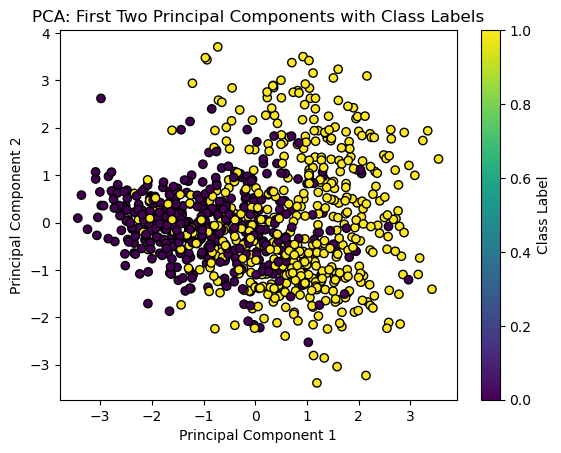

In [45]:
import matplotlib.pyplot as plt

plt.scatter(x_p[:, 0], x_p[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA: First Two Principal Components with Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class Label')
plt.show()

